<a href="https://colab.research.google.com/github/Gltknzk/1-PROJECTS/blob/main/Copy_of_military_power_ass27_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [14]:
df=pd.read_excel("/content/World military power.xlsx")
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

## Implement basic steps to see how is your data looks like

In [16]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [17]:
df[df["Total Coastline Coverage value"]=='2,02,080']["Total Coastline Coverage value"].str.replace(",","").astype(float)

22    202080.0
Name: Total Coastline Coverage value, dtype: float64

In [18]:
df["Total Coastline Coverage value"].iloc[22]=202080

In [19]:
df["Total Coastline Coverage value"]=df["Total Coastline Coverage value"].astype(float)

In [20]:
df["Oil Production value"]

0              0
1          16000
2      13,06,000
3      16,66,000
4       4,79,400
         ...    
133    20,07,000
134     2,71,400
135        12260
136            0
137            0
Name: Oil Production value, Length: 138, dtype: object

In [21]:
df["Oil Production value"]=df["Oil Production value"].str.replace(",","").astype(float)

In [22]:
df["Oil Production value"]

0            NaN
1            NaN
2      1306000.0
3      1666000.0
4       479400.0
         ...    
133    2007000.0
134     271400.0
135          NaN
136          NaN
137          NaN
Name: Oil Production value, Length: 138, dtype: float64

In [23]:
df["defense spending budget value"]=df["defense spending budget value"].str.replace(",","").astype(float)
df["defense spending budget value"]

0      1.200000e+10
1      2.500000e+08
2      1.300000e+10
3      7.000000e+09
4      4.200000e+09
           ...     
133    7.450000e+08
134    5.500000e+09
135    1.400000e+09
136    4.000000e+07
137    1.000000e+08
Name: defense spending budget value, Length: 138, dtype: float64

In [24]:
df["External Debt value"]=df["External Debt value"].str.replace(",","").astype(float)


In [25]:
df["External Debt value"]

0      2.840000e+09
1      9.505000e+09
2      6.260000e+09
3      4.208000e+10
4      2.149000e+11
           ...     
133    1.003000e+11
134    9.658000e+10
135    7.068000e+09
136    1.166000e+10
137    9.357000e+09
Name: External Debt value, Length: 138, dtype: float64

In [26]:
df["External Debt value"]

0      2.840000e+09
1      9.505000e+09
2      6.260000e+09
3      4.208000e+10
4      2.149000e+11
           ...     
133    1.003000e+11
134    9.658000e+10
135    7.068000e+09
136    1.166000e+10
137    9.357000e+09
Name: External Debt value, Length: 138, dtype: float64

In [27]:
df["Oil Consumption value"]=df["Oil Consumption value"].str.replace(",","").astype(float)

In [28]:
df["Oil Consumption value"]

0           NaN
1           NaN
2      325000.0
3           NaN
4      685000.0
         ...   
133    575000.0
134    525000.0
135    145000.0
136         NaN
137         NaN
Name: Oil Consumption value, Length: 138, dtype: float64

In [29]:
df["Proven Oil Reserves value"]=df["Proven Oil Reserves value"].str.replace(",","").astype(float)

In [30]:
df["Proven Oil Reserves value"]

0               NaN
1      1.683000e+08
2      1.220000e+10
3      8.273000e+09
4      2.185000e+09
           ...     
133    3.009000e+11
134    4.400000e+09
135    3.000000e+09
136             NaN
137             NaN
Name: Proven Oil Reserves value, Length: 138, dtype: float64

In [31]:
df["Available Manpower value"]=df["Available Manpower value"].str.replace(",","").astype(float)

In [32]:
df["Available Manpower value"]

0      14325743.0
1       1519438.0
2      20741263.0
3       6244205.0
4      20179430.0
          ...    
133    14260129.0
134    51043216.0
135    11266221.0
136     6166905.0
137     5584086.0
Name: Available Manpower value, Length: 138, dtype: float64

In [33]:
df["Total Population value"]=df["Total Population value"].str.replace(",","").astype(float)

In [34]:
df["Total Population value"]

0      34940837.0
1       3057220.0
2      41657488.0
3      30355880.0
4      44694198.0
          ...    
133    31689176.0
134    97040334.0
135    28667230.0
136    16445079.0
137    14030368.0
Name: Total Population value, Length: 138, dtype: float64

In [35]:
df["Total Square Land Area value"]=df["Total Square Land Area value"].str.replace(",","").astype(float)

In [36]:
df["Total Square Land Area value"]

0       652230.0
1            NaN
2      2381741.0
3      1246700.0
4      2780400.0
         ...    
133     912050.0
134     331210.0
135     527968.0
136     752618.0
137     390757.0
Name: Total Square Land Area value, Length: 138, dtype: float64

In [37]:
#df["Total Waterway Coverage value"]=
df["Total Waterway Coverage value"].astype(float)

ValueError: ignored

In [38]:
df[df["Total Waterway Coverage value"]=="1,10,000"]["Total Waterway Coverage value"].str.replace(",","").astype(float)

26    110000.0
Name: Total Waterway Coverage value, dtype: float64

In [39]:
df["Total Waterway Coverage value"].iloc[26]=110000

In [40]:
df["Total Waterway Coverage value"].iloc[38]=104300

In [41]:
df[df["Total Waterway Coverage value"]=="1,04,300"]["Total Waterway Coverage value"].str.replace(",","").astype(float)

Series([], Name: Total Waterway Coverage value, dtype: float64)

In [42]:
df["Total Waterway Coverage value"].iloc[101]=102000

In [43]:
df["Total Waterway Coverage value"]=df["Total Waterway Coverage value"].astype(float)

In [44]:
df[df["Total Waterway Coverage value"]=="1,02,000"]["Total Waterway Coverage value"].str.replace(",","").astype(float)

AttributeError: ignored

In [45]:
df["Total Border Coverage value"] 

0       5987.0
1        691.0
2       6734.0
3       5369.0
4      11968.0
        ...   
133     5267.0
134     4616.0
135     1601.0
136     6043.0
137     3229.0
Name: Total Border Coverage value, Length: 138, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [47]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

## Convert multi index columns to one level

In [48]:
df2=df.select_dtypes("number")

In [49]:
df2.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,1.3444,260,0,25,30,0,187,0,0,1062,...,43,NaN,NaN,NaN,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19,0,0,0,0,19,0,0,467,...,4,NaN,NaN,1.683000e+08,1519438.0,3057220.0,NaN,362.0,41.0,691.0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295,72,18,30,47,126,15,379,595,...,176,1666000.0,NaN,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227,24,7,9,64,100,0,370,739,...,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [ ]:
#I HAVE DELETD FİRST ROW BEFORE IMPORTING DATA

## Detect and drop duplicated columns

In [50]:
df2.duplicated().sum()

0

In [7]:
new_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

new_cols

['Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverage value']

In [51]:
new_df = df[new_cols].copy()
new_df.insert(0, "country",df["Military Strength"])
new_df.head() 

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,260,0,25,30,0,187,0,0,1062,...,43,NaN,NaN,NaN,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,Albania,19,0,0,0,0,19,0,0,467,...,4,NaN,NaN,1.683000e+08,1519438.0,3057220.0,NaN,362.0,41.0,691.0
2,Algeria,551,103,22,59,87,257,45,880,7361,...,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,Angola,295,72,18,30,47,126,15,379,595,...,176,1666000.0,NaN,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,Argentina,227,24,7,9,64,100,0,370,739,...,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


## Check for missing values 

In [52]:
new_df.isnull().sum()

country                                     0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value              

In [53]:
new_df["Navy Fleet Strengths value"].fillna(df2["Navy Fleet Strengths value"].mean(), inplace=True)

In [54]:
new_df["Aircraft Carrier Fleet Strength value"].fillna(df2["Aircraft Carrier Fleet Strength value"].mean(), inplace=True)

In [55]:
new_df["Submarine Fleet Strength value"].fillna(df2["Submarine Fleet Strength value"].mean(), inplace=True)

In [56]:
new_df["Destroyer Fleet Strength value"].fillna(df2["Destroyer Fleet Strength value"].mean(), inplace=True)

In [57]:
new_df["Frigate Fleet Strength value"].fillna(df2["Frigate Fleet Strength value"].mean(), inplace=True)

In [58]:
new_df["Oil Production value"].fillna(df2["Oil Production value"].mean(), inplace=True)

In [59]:
new_df["Oil Consumption value"].fillna(df2["Oil Consumption value"].mean(), inplace=True)

In [60]:
new_df["Proven Oil Reserves value"].fillna(df2["Proven Oil Reserves value"].mean(), inplace=True)

In [61]:
new_df["Total Square Land Area value"].fillna(df2["Total Square Land Area value"].mean(), inplace=True)

In [62]:
new_df["Total Coastline Coverage value"].fillna(df2["Total Coastline Coverage value"].mean(), inplace=True)

In [63]:
new_df["Total Border Coverage value"].fillna(df2["Total Border Coverage value"].mean(), inplace=True)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [64]:
new_df.isnull().sum()

country                                    0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

## Fix the dtypes

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [65]:
new_df.drop(['Total Square Land Area value',
               'Total Coastline Coverage value',
               'Total Waterway Coverage value',
               'Total Border Coverage value'],axis=1,inplace=True)


In [66]:
new_df

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,Afghanistan,260,0,25,30,0,187,0,0,1062,...,0.0,0.0,1.200000e+10,2.840000e+09,43,1.944295e+06,1.229558e+06,1.791618e+10,14325743.0,34940837.0
1,Albania,19,0,0,0,0,19,0,0,467,...,0.0,0.0,2.500000e+08,9.505000e+09,4,1.944295e+06,1.229558e+06,1.683000e+08,1519438.0,3057220.0
2,Algeria,551,103,22,59,87,257,45,880,7361,...,0.0,5.0,1.300000e+10,6.260000e+09,157,1.306000e+06,3.250000e+05,1.220000e+10,20741263.0,41657488.0
3,Angola,295,72,18,30,47,126,15,379,595,...,0.0,0.0,7.000000e+09,4.208000e+10,176,1.666000e+06,1.229558e+06,8.273000e+09,6244205.0,30355880.0
4,Argentina,227,24,7,9,64,100,0,370,739,...,4.0,0.0,4.200000e+09,2.149000e+11,1138,4.794000e+05,6.850000e+05,2.185000e+09,20179430.0,44694198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,260,38,0,52,82,86,10,390,600,...,0.0,4.0,7.450000e+08,1.003000e+11,444,2.007000e+06,5.750000e+05,3.009000e+11,14260129.0,31689176.0
134,Vietnam,293,77,0,38,36,138,25,2615,2530,...,0.0,9.0,5.500000e+09,9.658000e+10,45,2.714000e+05,5.250000e+05,4.400000e+09,51043216.0,97040334.0
135,Yemen,169,77,0,8,21,61,14,620,615,...,0.0,0.0,1.400000e+09,7.068000e+09,57,1.944295e+06,1.450000e+05,3.000000e+09,11266221.0,28667230.0
136,Zambia,108,18,0,11,52,27,0,75,184,...,0.0,0.0,4.000000e+07,1.166000e+10,88,1.944295e+06,1.229558e+06,1.791618e+10,6166905.0,16445079.0


## Visualy inspect the some features

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [68]:
import plotly.express as px 

In [72]:
fig = px.bar(new_df,x= "country" , y = new_df["Aircraft Strength value"])
fig.show()

## Decriptive statistics

# Data Preprocessing

In [73]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.0,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.0,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.0,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.0,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.0,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.0,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.0,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.0,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.0,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04
Self-Propelled Artillery Strength value,138.0,2.121594e+02,6.880290e+02,0.0,0.000000e+00,2.300000e+01,9.725000e+01,6.083000e+03


# Modelling

In [77]:
X = new_df.drop(["country"], axis=1) 

In [78]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

## Clustering with K-means

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [83]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [84]:
ssd

[1784.7504082700275,
 1173.7194159810624,
 939.6564741772888,
 774.4633431260625,
 657.3070330593227,
 544.1393137891046,
 439.06381335909015,
 374.6835645551415]

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

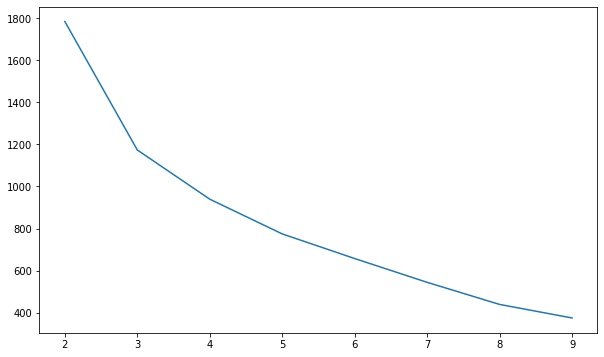

In [85]:
sns.lineplot(x=K, y = ssd,markers="x")

In [86]:
from yellowbrick.cluster import KElbowVisualizer

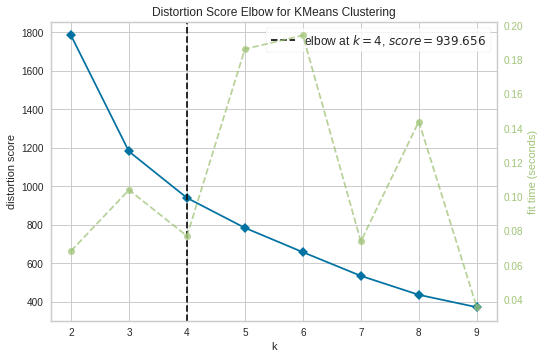

In [87]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()  

In [88]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from pyclustertend import hopkins

In [90]:
X.shape

(138, 25)

In [91]:
hopkins(X, X.shape[0])

0.0760668059743326

In [ ]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_) 

Text(0.5, 1.0, 'elbow method')

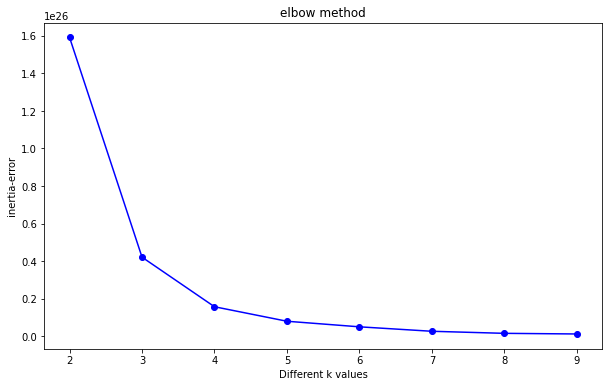

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [ ]:
ssd

[1.5916083338737998e+26,
 4.207646555307283e+25,
 1.567286318737964e+25,
 7.946074619598564e+24,
 4.97433067706766e+24,
 2.603569113449086e+24,
 1.5052217243194396e+24,
 1.1658881301447093e+24]

### Model Building and label visualisation

In [96]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [97]:
model.inertia_

939.4496578633648

In [99]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

### Evaluate 

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
new_df["cluster"] = model.labels_

In [105]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8732245690954031
For n_clusters=3, the silhouette score is 0.8314905742029727
For n_clusters=4, the silhouette score is 0.6178041134103108
For n_clusters=5, the silhouette score is 0.588044181986142
For n_clusters=6, the silhouette score is 0.6301817899860189
For n_clusters=7, the silhouette score is 0.5074586888205388
For n_clusters=8, the silhouette score is 0.49553522502950137


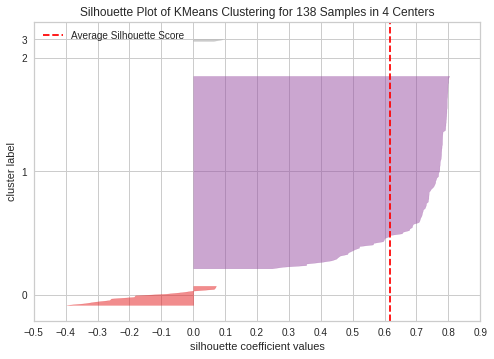

In [106]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [108]:
new_df[new_df["cluster"] == 3]

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
35,Egypt,1054,215,88,59,387,294,81,4295,11700,...,7.000000,1.120000e+10,7.747000e+10,83,5.894000e+05,8.320000e+05,4.400000e+09,42946553.0,9.941332e+07,3
49,India,2123,538,172,250,359,722,23,4292,8686,...,13.000000,6.100000e+10,5.016000e+11,346,7.339000e+05,5.000000e+06,4.621000e+09,622480340.0,1.296834e+09,3
51,Iran,509,155,23,62,94,100,12,2056,4300,...,7.000000,1.960000e+10,7.995000e+09,319,4.469000e+06,2.000000e+06,1.584000e+11,47324105.0,8.302474e+07,3
87,North Korea,949,458,114,4,169,204,20,6045,10000,...,11.000000,1.600000e+09,5.000000e+09,82,1.944295e+06,1.229558e+06,1.791618e+10,13045878.0,2.538108e+07,3
91,Pakistan,1372,356,90,49,513,346,56,2200,7330,...,9.000000,1.140000e+10,8.219000e+10,151,1.944295e+06,5.750000e+05,3.506000e+08,96344277.0,2.078625e+08,3
102,Saudi Arabia,879,270,81,49,208,283,34,1062,12825,...,3.000000,6.760000e+10,2.051000e+11,214,1.013000e+07,4.000000e+06,2.665000e+11,17703745.0,3.309111e+07,3
110,South Korea,1649,414,71,41,298,803,112,2614,14000,...,3.521739,4.400000e+10,3.846000e+11,111,1.944295e+06,2.800000e+06,1.791618e+10,25709049.0,5.141810e+07,3
118,Syria,456,199,20,5,67,165,27,4135,5370,...,2.000000,1.800000e+09,4.989000e+09,90,1.944295e+06,2.600000e+05,2.500000e+09,12450728.0,1.945426e+07,3
124,Turkey,1055,206,0,80,276,497,100,2622,8777,...,16.000000,1.900000e+10,4.524000e+11,98,2.450000e+05,8.450000e+05,3.885000e+08,41847478.0,8.125724e+07,3
